# **Código de Analisis exploratorio 1 - Proyecto de Grado 2025-1**
## **Identificación de contratos públicos sujetos a adiciones en el sector de la salud con modelos de machine learning**

### **Elaborado por:**  
#### Marco Antonio Cruz y Paula Andrea Ovalle
m.cruzg@uniandes.edu.co-202020941 y P.ovallev@uniandes.edu.co-202021735



## Librerias y carga csv

In [4]:
import pandas as pd
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.preprocessing import LabelEncoder
#from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
#### Activar segun quien trabaje 
#Marco
#Filepath = "C:/Users/user/OneDrive/Documentos/semestres uniandes/Clases 2025-1/Tesis IIND/Solo sector salud/base con categorias reducidas.csv"
#Paula
Filepath= "C:/Users/paula/OneDrive/Documentos/10 Semestre/Tesis/base con categorias reducidas.csv"
df=pd.read_csv(Filepath)
df

,nombre entidad,departamento,ciudad,orden,rama,entidad centralizada,estado contrato,codigo de categoria principal,tipo de contrato,modalidad de contratacion,...,adjudicado,id adjudicacion,departamento proveedor,ciudad proveedor,valor total adjudicacion,nombre del adjudicador,nombre del proveedor adjudicado,estado de apertura del proceso,Adicion,tiempo duracion (dias)
0,SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...,Distrito Capital de Bogotá,Bogotá,Territorial,Corporación Autónoma,Descentralizada,Modificado,V1.85101600,Decreto 092 de 2017,Contratación régimen especial,...,No,No Adjudicado,Distrito Capital de Bogotá,Bogotá,0,No Adjudicado,Other,Abierto,1,95.0
1,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,Distrito Capital de Bogotá,Bogotá,Territorial,Ejecutivo,Descentralizada,Modificado,V1.85101604,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Distrito Capital de Bogotá,No Definido,0,No Adjudicado,Other,Abierto,1,116.0
2,Other,Atlántico,Soledad,Territorial,Ejecutivo,Descentralizada,Modificado,Other,Prestación de servicios,Mínima cuantía,...,Si,Other,Atlántico,Barranquilla,54000000,Other,Other,Cerrado,1,163.0
3,Other,Meta,Villavicencio,Territorial,Ejecutivo,Centralizada,En ejecución,V1.85101600,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Meta,Other,0,No Adjudicado,Other,Abierto,0,38.0
4,SUBRED INTEGRADA DE SERVICIO DE SALUD CENTRO O...,Distrito Capital de Bogotá,Bogotá,Territorial,Ejecutivo,Descentralizada,En ejecución,V1.80111600,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Distrito Capital de Bogotá,Bogotá,0,No Adjudicado,Other,Abierto,1,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487207,Other,Casanare,Yopal,Territorial,Ejecutivo,Descentralizada,En ejecución,V1.80111701,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Casanare,Other,0,No Adjudicado,Other,Abierto,0,30.0
487208,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,Distrito Capital de Bogotá,Bogotá,Territorial,Ejecutivo,Descentralizada,Modificado,V1.80111600,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Cundinamarca,No Definido,0,No Adjudicado,Other,Abierto,1,365.0
487209,Other,Nariño,No Definido,Nacional,Ejecutivo,Centralizada,En ejecución,V1.80111600,Prestación de servicios,Contratación directa,...,No,No Adjudicado,Nariño,Other,0,No Adjudicado,Other,Abierto,0,175.0
487210,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,Distrito Capital de Bogotá,Bogotá,Territorial,Ejecutivo,Descentralizada,En ejecución,V1.85101604,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Distrito Capital de Bogotá,Bogotá,0,No Adjudicado,Other,Abierto,0,119.0


In [3]:
print(list(df.columns))

['nombre entidad', 'departamento', 'ciudad', 'orden', 'rama', 'entidad centralizada', 'estado contrato', 'codigo de categoria principal', 'tipo de contrato', 'modalidad de contratacion', 'justificacion modalidad de contratacion', 'fecha de firma', 'condiciones de entrega', 'es grupo', 'es pyme', 'habilita pago adelantado', 'liquidación', 'obligación ambiental', 'obligaciones postconsumo', 'reversion', 'origen de los recursos', 'destino gasto', 'valor del contrato', 'valor de pago adelantado', 'valor facturado', 'valor pendiente de pago', 'valor pagado', 'valor amortizado', 'valor pendiente de amortizacion', 'valor pendiente de ejecucion', 'estado bpin', 'código bpin', 'anno bpin', 'saldo cdp', 'saldo vigencia', 'espostconflicto', 'dias adicionados', 'puntos del acuerdo', 'pilares del acuerdo', 'nombre representante legal', 'nacionalidad representante legal', 'presupuesto general de la nacion – pgn', 'sistema general de participaciones', 'sistema general de regalías', 'recursos propios 

In [6]:
df["ciudad"].value_counts()

ciudad
Bogotá           250048
Other            116401
No Definido       28156
Cali              23715
Santa Marta       15907
Cartagena          9068
Manizales          8340
Villavicencio      7621
Soacha             5982
Bucaramanga        5889
Cúcuta             5660
Yopal              5390
Soledad            5035
Name: count, dtype: int64

### Analisis exploratorio entender variables

Variable nombre entidad

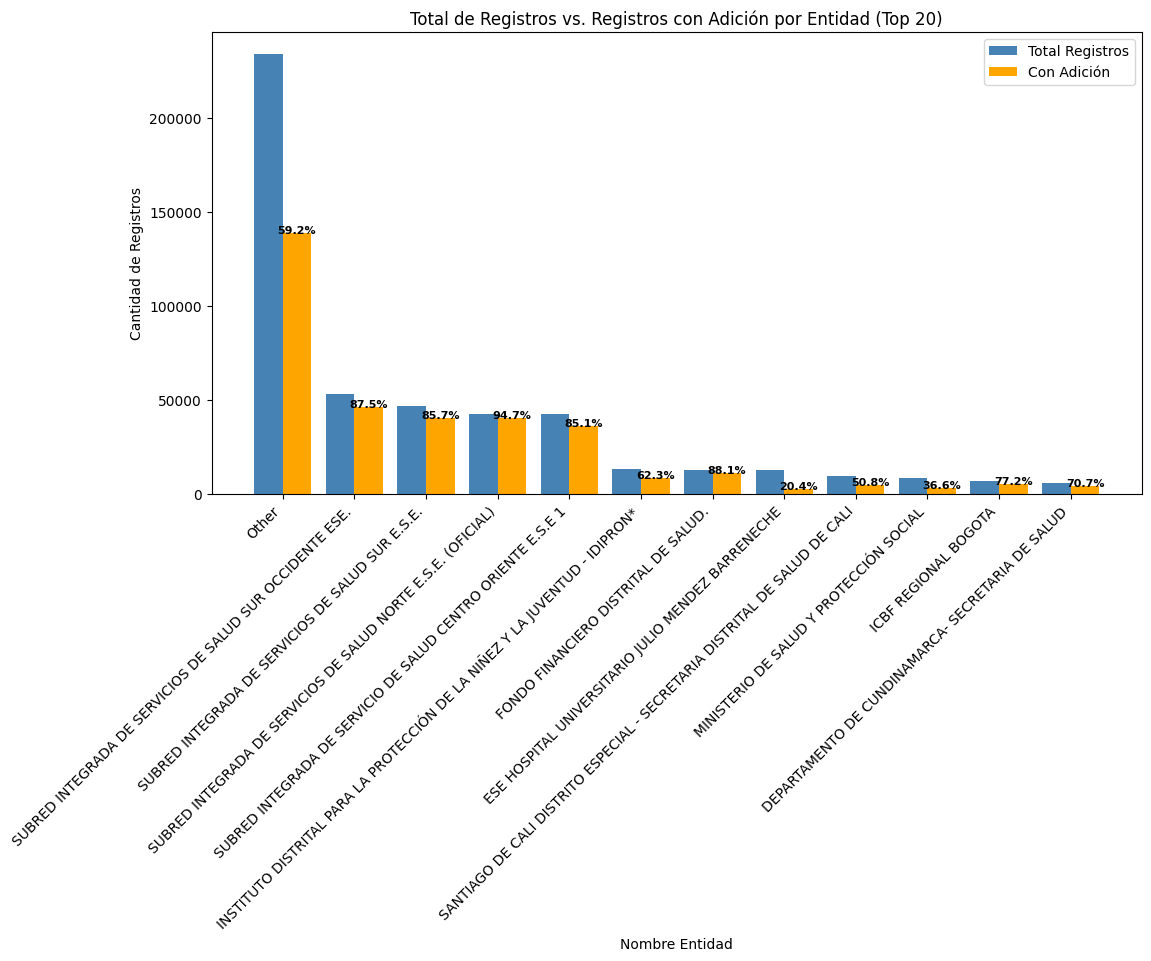

In [9]:

# Contar total de registros por entidad
total_por_entidad = df['nombre entidad'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_entidad = df[df['Adicion'] == 1]['nombre entidad'].value_counts()

# Unir ambas series en un DataFrame
df_entidades = pd.DataFrame({'Total Registros': total_por_entidad, 'Con Adición': adicion_por_entidad}).fillna(0)

# Calcular el porcentaje de adición
df_entidades["% Adición"] = (df_entidades["Con Adición"] / df_entidades["Total Registros"]) * 100

# Seleccionar las 20 entidades con más registros
top_entidades = df_entidades.nlargest(20, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_entidades))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_entidades['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_entidades['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_entidades["% Adición"]):
    ax.text(x[i] + width/2, top_entidades["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=8, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_entidades.index, rotation=45, ha="right")
ax.set_xlabel("Nombre Entidad")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Entidad (Top 20)")
ax.legend()

# Mostrar la gráfica
plt.show()



Variable departamento

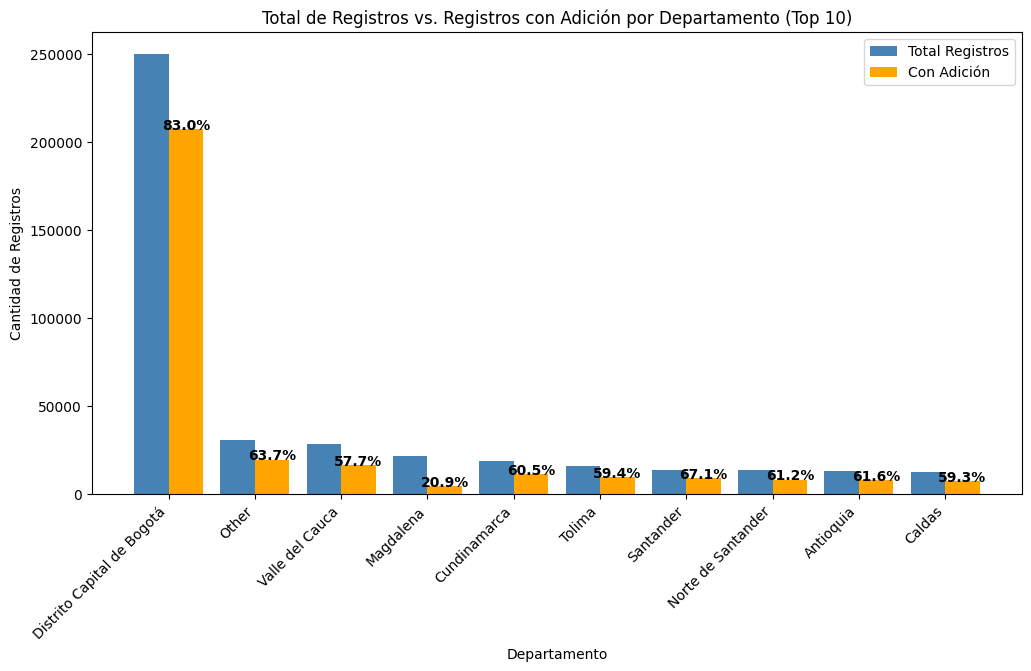

In [10]:


# Contar total de registros por departamento
total_por_departamento = df['departamento'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_departamento = df[df['Adicion'] == 1]['departamento'].value_counts()

# Unir ambas series en un DataFrame
df_departamentos = pd.DataFrame({'Total Registros': total_por_departamento, 'Con Adición': adicion_por_departamento}).fillna(0)

# Calcular el porcentaje de adición
df_departamentos["% Adición"] = (df_departamentos["Con Adición"] / df_departamentos["Total Registros"]) * 100

# Seleccionar los 10 departamentos con más registros
top_departamentos = df_departamentos.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_departamentos))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_departamentos['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_departamentos['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_departamentos["% Adición"]):
    ax.text(x[i] + width/2, top_departamentos["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_departamentos.index, rotation=45, ha="right")
ax.set_xlabel("Departamento")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Departamento (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable ciudad

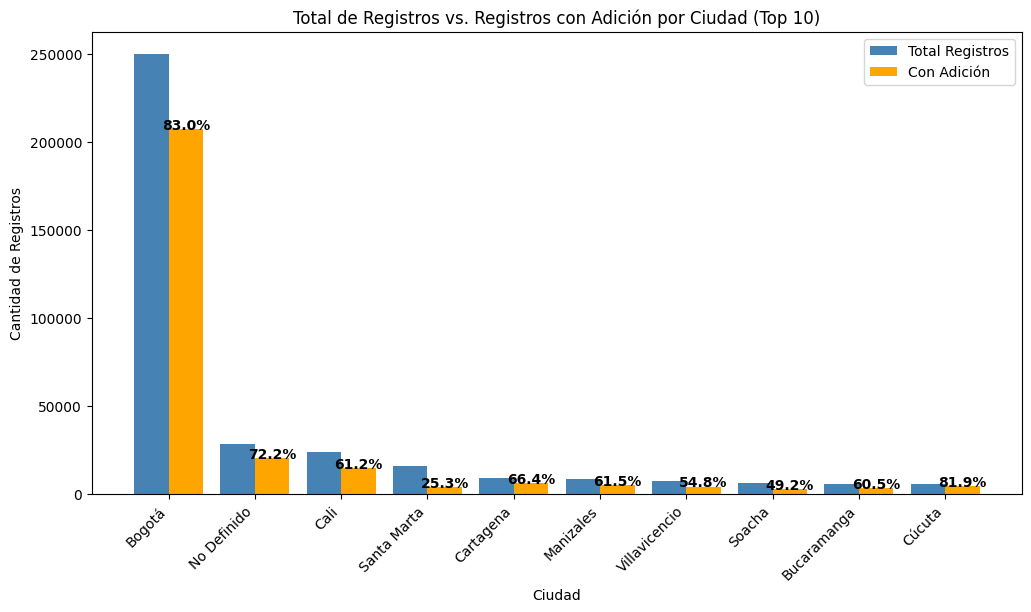

In [258]:
import matplotlib.pyplot as plt
import numpy as np

# Contar total de registros por ciudad
total_por_ciudad = df['ciudad'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_ciudad = df[df['Adicion'] == 1]['ciudad'].value_counts()

# Unir ambas series en un DataFrame
df_ciudades = pd.DataFrame({'Total Registros': total_por_ciudad, 'Con Adición': adicion_por_ciudad}).fillna(0)

# Calcular el porcentaje de adición
df_ciudades["% Adición"] = (df_ciudades["Con Adición"] / df_ciudades["Total Registros"]) * 100

# Seleccionar las 10 ciudades con más registros
top_ciudades = df_ciudades.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_ciudades))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_ciudades['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_ciudades['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_ciudades["% Adición"]):
    ax.text(x[i] + width/2, top_ciudades["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_ciudades.index, rotation=45, ha="right")
ax.set_xlabel("Ciudad")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Ciudad (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable orden

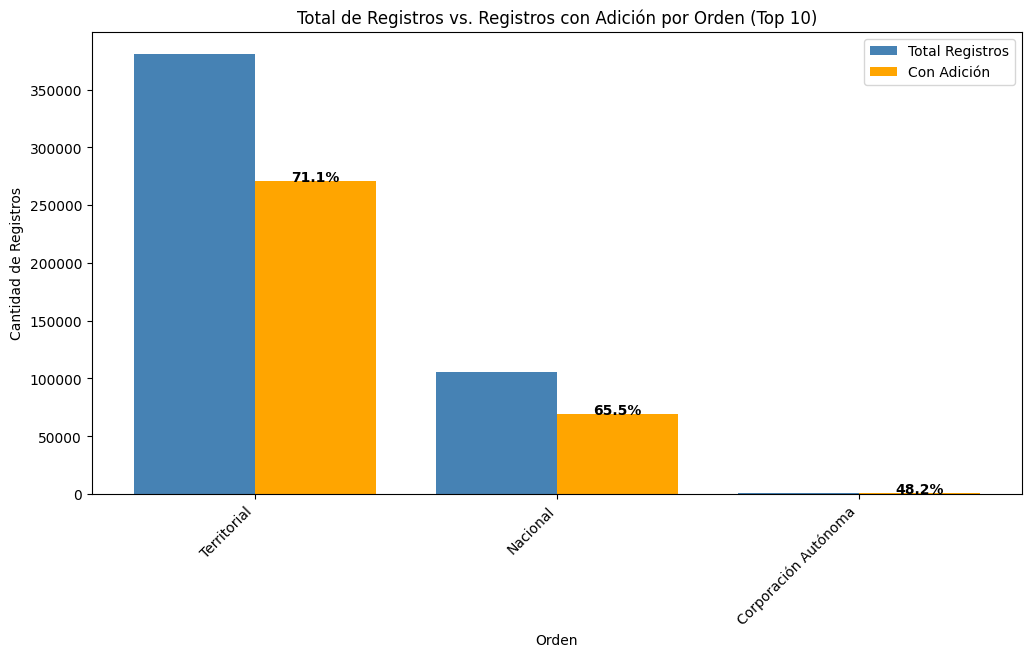

In [259]:
import matplotlib.pyplot as plt
import numpy as np

# Contar total de registros por orden
total_por_orden = df['orden'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_orden = df[df['Adicion'] == 1]['orden'].value_counts()

# Unir ambas series en un DataFrame
df_orden = pd.DataFrame({'Total Registros': total_por_orden, 'Con Adición': adicion_por_orden}).fillna(0)

# Calcular el porcentaje de adición
df_orden["% Adición"] = (df_orden["Con Adición"] / df_orden["Total Registros"]) * 100

# Seleccionar las 10 categorías con más registros
top_orden = df_orden.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_orden))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_orden['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_orden['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_orden["% Adición"]):
    ax.text(x[i] + width/2, top_orden["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_orden.index, rotation=45, ha="right")
ax.set_xlabel("Orden")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Orden (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable rama

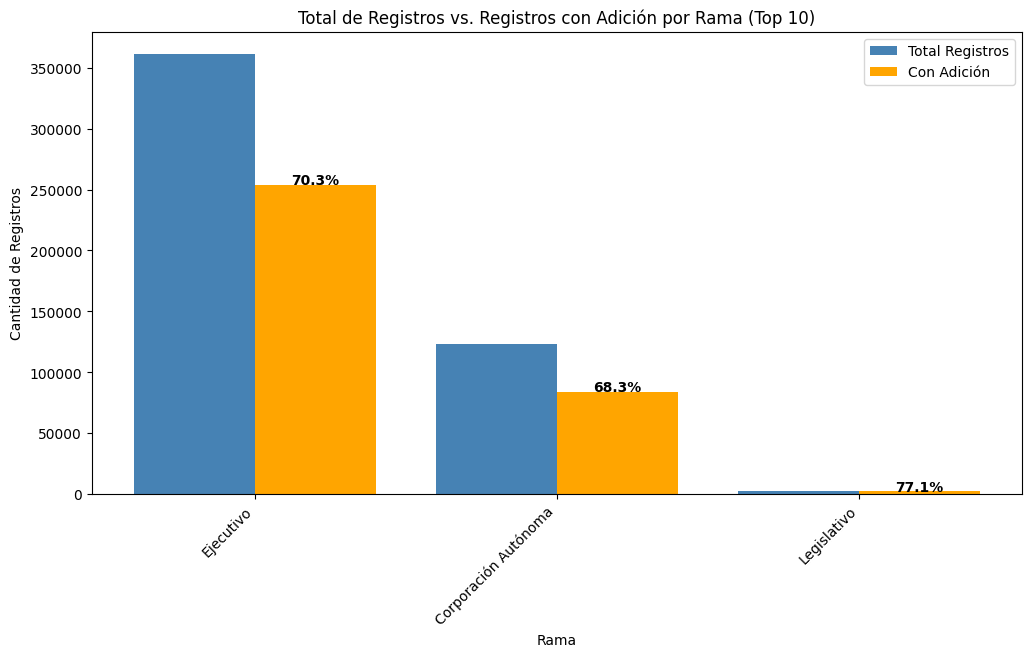

In [ ]:

# Contar total de registros por rama
total_por_rama = df['rama'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_rama = df[df['Adicion'] == 1]['rama'].value_counts()

# Unir ambas series en un DataFrame
df_rama = pd.DataFrame({'Total Registros': total_por_rama, 'Con Adición': adicion_por_rama}).fillna(0)

# Calcular el porcentaje de adición
df_rama["% Adición"] = (df_rama["Con Adición"] / df_rama["Total Registros"]) * 100

# Seleccionar las categorías con más registros
top_ramas = df_rama.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_ramas))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_ramas['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_ramas['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_ramas["% Adición"]):
    ax.text(x[i] + width/2, top_ramas["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_ramas.index, rotation=45, ha="right")
ax.set_xlabel("Rama")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Rama (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


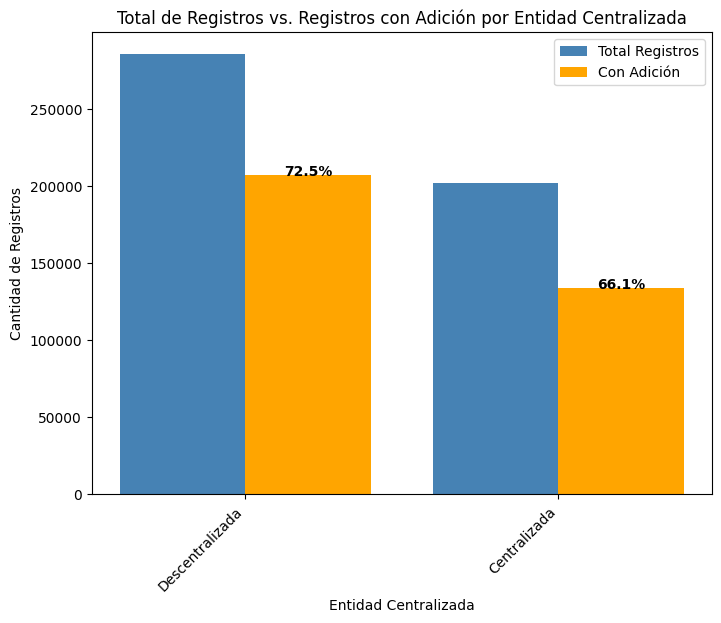

In [271]:
import matplotlib.pyplot as plt
import numpy as np

# Contar total de registros por entidad centralizada
total_por_centralizada = df['entidad centralizada'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_centralizada = df[df['Adicion'] == 1]['entidad centralizada'].value_counts()

# Unir ambas series en un DataFrame
df_centralizada = pd.DataFrame({'Total Registros': total_por_centralizada, 'Con Adición': adicion_por_centralizada}).fillna(0)

# Calcular el porcentaje de adición
df_centralizada["% Adición"] = (df_centralizada["Con Adición"] / df_centralizada["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_centralizada))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_centralizada['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_centralizada['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_centralizada["% Adición"]):
    ax.text(x[i] + width/2, df_centralizada["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_centralizada.index, rotation=45, ha="right")
ax.set_xlabel("Entidad Centralizada")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Entidad Centralizada")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable estado contrato

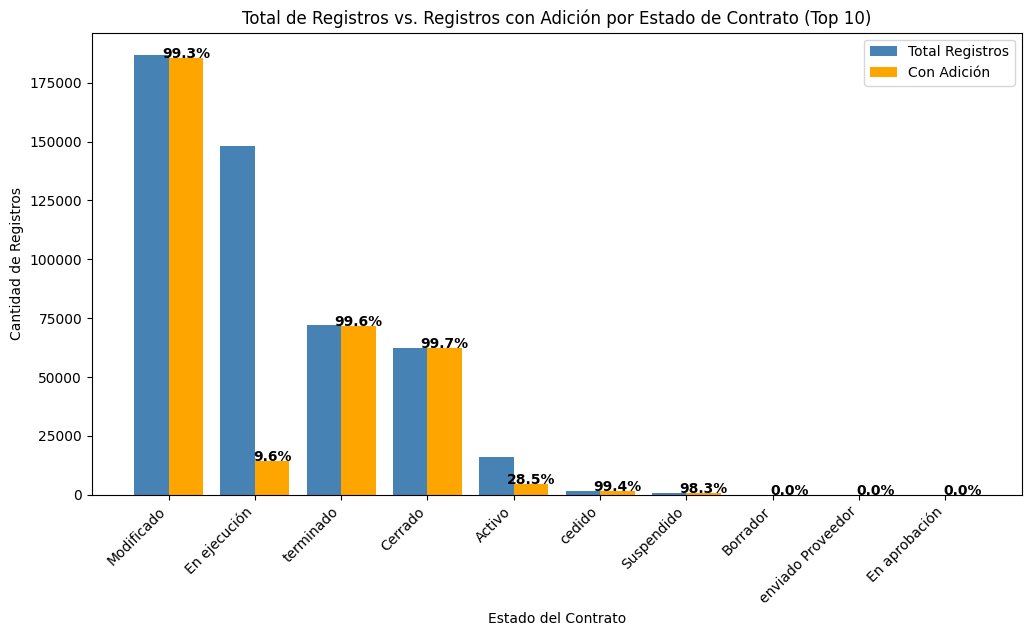

In [270]:
import matplotlib.pyplot as plt
import numpy as np

# Contar total de registros por estado contrato
total_por_estado = df['estado contrato'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_estado = df[df['Adicion'] == 1]['estado contrato'].value_counts()

# Unir ambas series en un DataFrame
df_estado = pd.DataFrame({'Total Registros': total_por_estado, 'Con Adición': adicion_por_estado}).fillna(0)

# Calcular el porcentaje de adición
df_estado["% Adición"] = (df_estado["Con Adición"] / df_estado["Total Registros"]) * 100

# Seleccionar las categorías con más registros
top_estados = df_estado.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_estados))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_estados['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_estados['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_estados["% Adición"]):
    ax.text(x[i] + width/2, top_estados["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_estados.index, rotation=45, ha="right")
ax.set_xlabel("Estado del Contrato")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Estado de Contrato (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable codigo de categoria principal

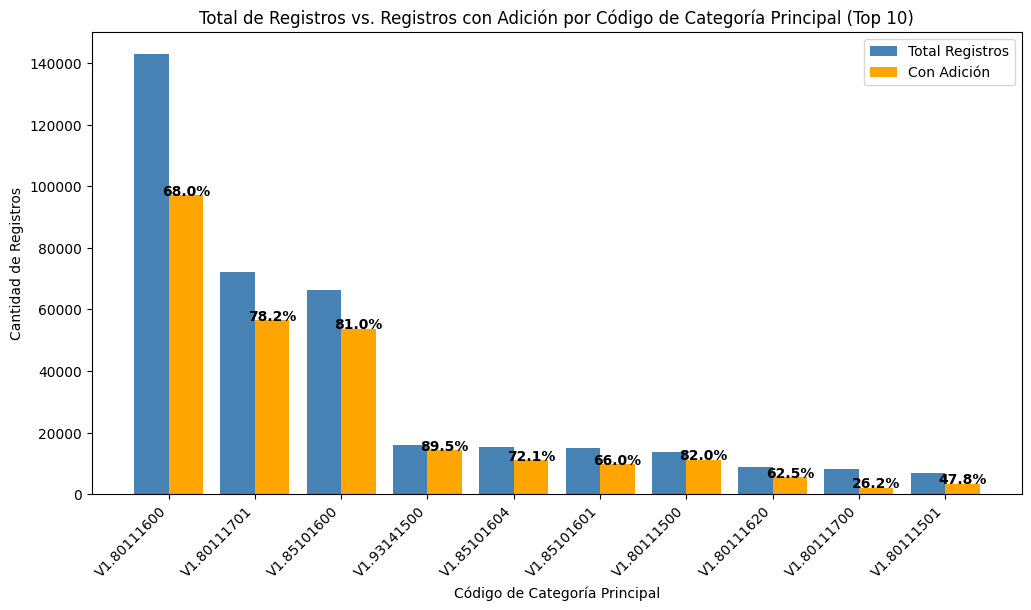

In [274]:
import matplotlib.pyplot as plt
import numpy as np

# Contar total de registros por código de categoría principal
total_por_categoria = df['codigo de categoria principal'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_categoria = df[df['Adicion'] == 1]['codigo de categoria principal'].value_counts()

# Unir ambas series en un DataFrame
df_categoria = pd.DataFrame({'Total Registros': total_por_categoria, 'Con Adición': adicion_por_categoria}).fillna(0)

# Calcular el porcentaje de adición
df_categoria["% Adición"] = (df_categoria["Con Adición"] / df_categoria["Total Registros"]) * 100

# Seleccionar las 10 categorías con más registros
top_categorias = df_categoria.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_categorias))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_categorias['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_categorias['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_categorias["% Adición"]):
    ax.text(x[i] + width/2, top_categorias["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_categorias.index, rotation=45, ha="right")
ax.set_xlabel("Código de Categoría Principal")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Código de Categoría Principal (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()




Variable tipo de contrato

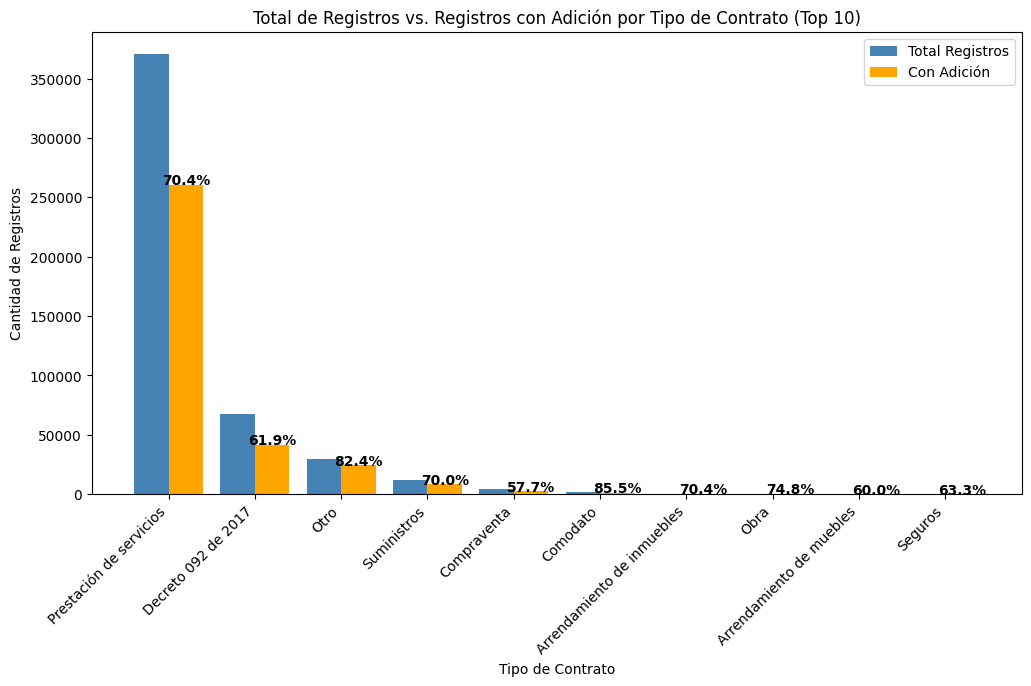

In [275]:
import matplotlib.pyplot as plt
import numpy as np

# Contar total de registros por tipo de contrato
total_por_tipo = df['tipo de contrato'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_tipo = df[df['Adicion'] == 1]['tipo de contrato'].value_counts()

# Unir ambas series en un DataFrame
df_tipo_contrato = pd.DataFrame({'Total Registros': total_por_tipo, 'Con Adición': adicion_por_tipo}).fillna(0)

# Calcular el porcentaje de adición
df_tipo_contrato["% Adición"] = (df_tipo_contrato["Con Adición"] / df_tipo_contrato["Total Registros"]) * 100

# Seleccionar los 10 tipos de contrato con más registros
top_tipos = df_tipo_contrato.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_tipos))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_tipos['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_tipos['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_tipos["% Adición"]):
    ax.text(x[i] + width/2, top_tipos["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_tipos.index, rotation=45, ha="right")
ax.set_xlabel("Tipo de Contrato")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Tipo de Contrato (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()




Variable modalidad de contratacion

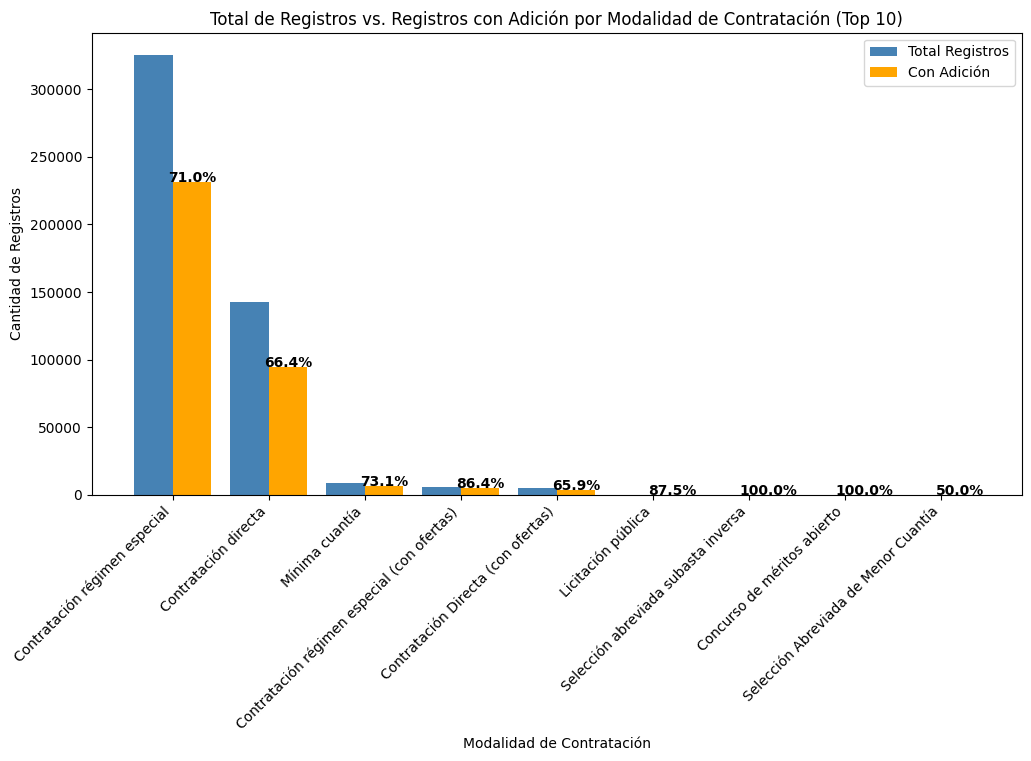

In [276]:


# Contar total de registros por modalidad de contratación
total_por_modalidad = df['modalidad de contratacion'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_modalidad = df[df['Adicion'] == 1]['modalidad de contratacion'].value_counts()

# Unir ambas series en un DataFrame
df_modalidad = pd.DataFrame({'Total Registros': total_por_modalidad, 'Con Adición': adicion_por_modalidad}).fillna(0)

# Calcular el porcentaje de adición
df_modalidad["% Adición"] = (df_modalidad["Con Adición"] / df_modalidad["Total Registros"]) * 100

# Seleccionar las 10 modalidades con más registros
top_modalidades = df_modalidad.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_modalidades))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_modalidades['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_modalidades['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_modalidades["% Adición"]):
    ax.text(x[i] + width/2, top_modalidades["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_modalidades.index, rotation=45, ha="right")
ax.set_xlabel("Modalidad de Contratación")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Modalidad de Contratación (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


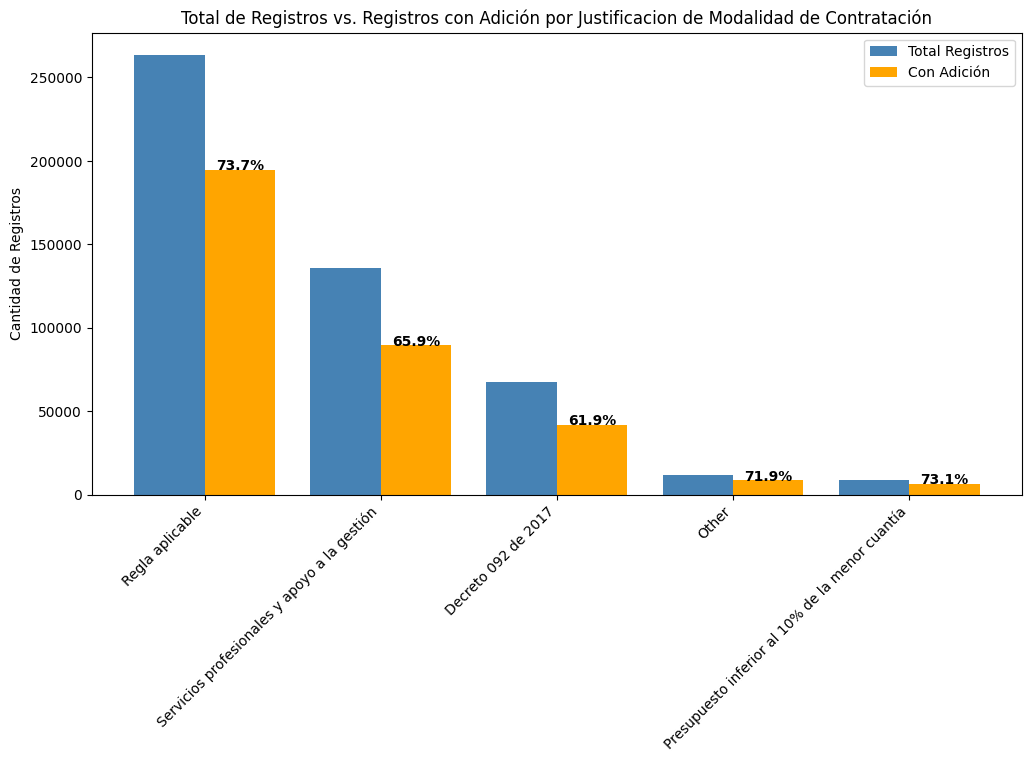

In [ ]:


# Contar total de registros por modalidad de justificacion
total_por_justificacion= df['justificacion modalidad de contratacion'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_justificacion = df[df['Adicion'] == 1]['justificacion modalidad de contratacion'].value_counts()

# Unir ambas series en un DataFrame
df_justificacion = pd.DataFrame({'Total Registros': total_por_justificacion, 'Con Adición': adicion_por_justificacion}).fillna(0)

# Calcular el porcentaje de adición
df_justificacion["% Adición"] = (df_justificacion["Con Adición"] / df_justificacion["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_justificacion))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_justificacion['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_justificacion['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_justificacion["% Adición"]):
    ax.text(x[i] + width/2, df_justificacion["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_justificacion.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Justificacion de Modalidad de Contratación")
ax.legend()

# Mostrar la gráfica
plt.show()


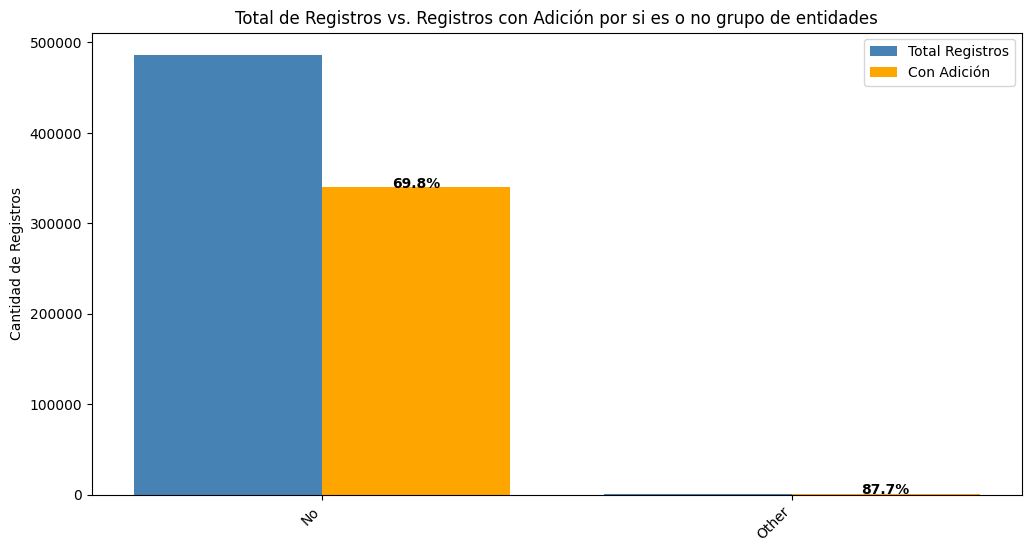

In [16]:


# Contar total de registros por si es o no grupo
total_por_grupo = df['es grupo'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_grupo = df[df['Adicion'] == 1]['es grupo'].value_counts()

# Unir ambas series en un DataFrame
df_grupo = pd.DataFrame({'Total Registros': total_por_grupo, 'Con Adición': adicion_por_grupo}).fillna(0)

# Calcular el porcentaje de adición
df_grupo["% Adición"] = (df_grupo["Con Adición"] / df_grupo["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_grupo))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_grupo['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_grupo['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_grupo["% Adición"]):
    ax.text(x[i] + width/2, df_grupo["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_grupo.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por si es o no grupo de entidades")
ax.legend()

# Mostrar la gráfica
plt.show()


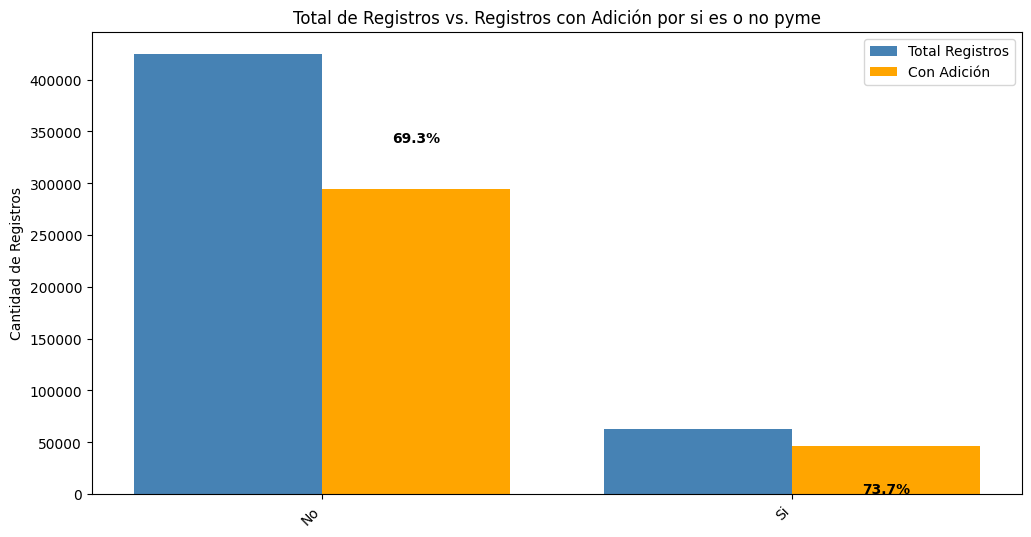

In [ ]:


# Contar total de registros por si es o no pymes
total_por_pyme = df['es pyme'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_pyme = df[df['Adicion'] == 1]['es pyme'].value_counts()

# Unir ambas series en un DataFrame
df_pyme = pd.DataFrame({'Total Registros': total_por_pyme, 'Con Adición': adicion_por_pyme}).fillna(0)

# Calcular el porcentaje de adición
df_pyme["% Adición"] = (df_pyme["Con Adición"] / df_pyme["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_pyme))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_pyme['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_pyme['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_pyme["% Adición"]):
    ax.text(x[i] + width/2, df_grupo["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_pyme.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por si es o no pyme")
ax.legend()

# Mostrar la gráfica
plt.show()


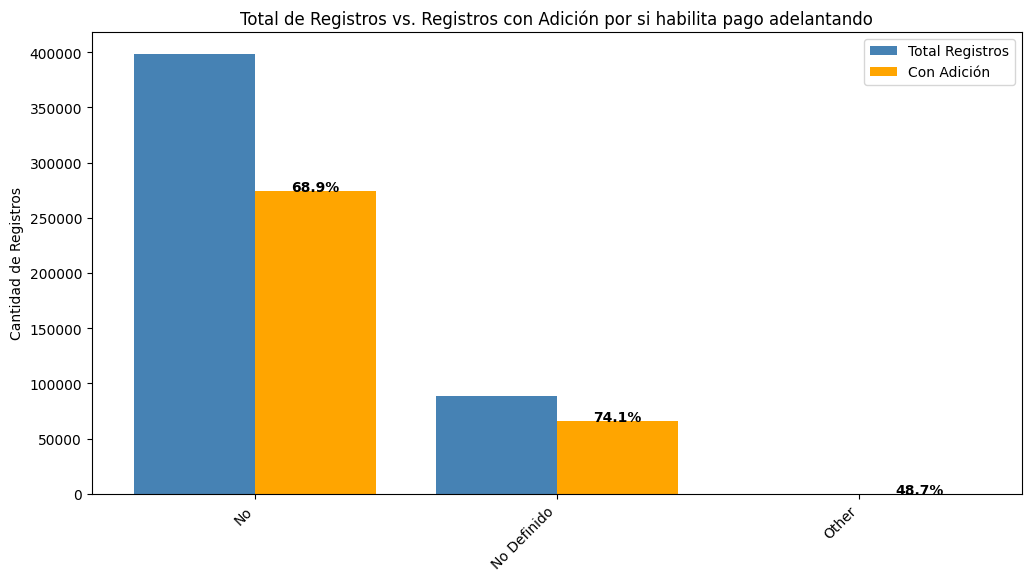

In [15]:
#Contar total de registros por si habilita pago adelantado
total_por_pagoad = df['habilita pago adelantado'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_pagoad = df[df['Adicion'] == 1]['habilita pago adelantado'].value_counts()

# Unir ambas series en un DataFrame
df_pagoad = pd.DataFrame({'Total Registros': total_por_pagoad, 'Con Adición': adicion_por_pagoad}).fillna(0)

# Calcular el porcentaje de adición
df_pagoad["% Adición"] = (df_pagoad["Con Adición"] / df_pagoad["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_pagoad))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_pagoad['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_pagoad['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_pagoad["% Adición"]):
    ax.text(x[i] + width/2, df_pagoad["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_pagoad.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por si habilita pago adelantando")
ax.legend()

# Mostrar la gráfica
plt.show()


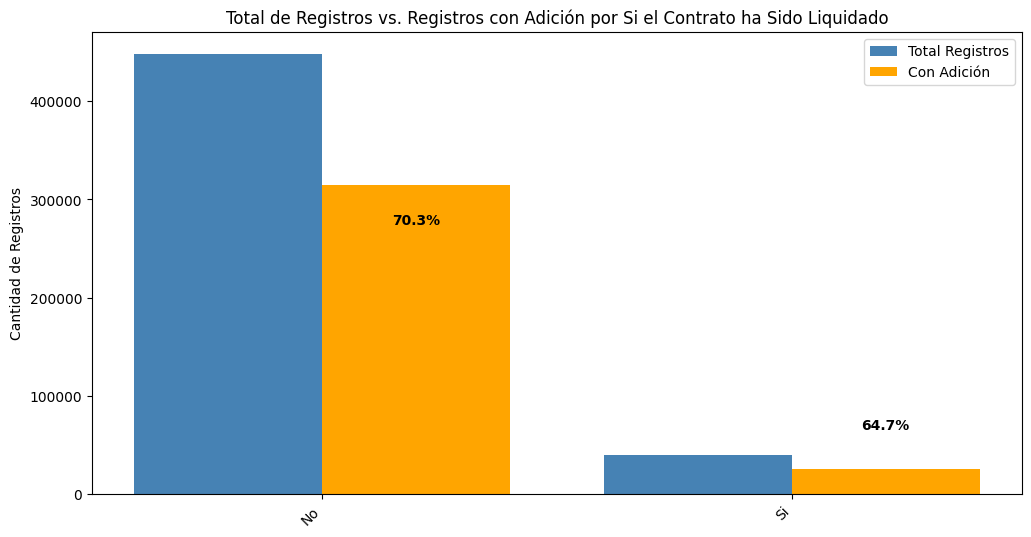

In [17]:
#Contar total de registros por si el contratado ha sido liquidado
total_por_liquidacion= df['liquidación'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_liquidacion = df[df['Adicion'] == 1]['liquidación'].value_counts()

# Unir ambas series en un DataFrame
df_liquidacion = pd.DataFrame({'Total Registros': total_por_liquidacion, 'Con Adición': adicion_por_liquidacion}).fillna(0)

# Calcular el porcentaje de adición
df_liquidacion["% Adición"] = (df_liquidacion["Con Adición"] / df_liquidacion["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_liquidacion))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_liquidacion['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_liquidacion['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_liquidacion["% Adición"]):
    ax.text(x[i] + width/2, df_pagoad["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_liquidacion.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Si el Contrato ha Sido Liquidado")
ax.legend()

# Mostrar la gráfica
plt.show()

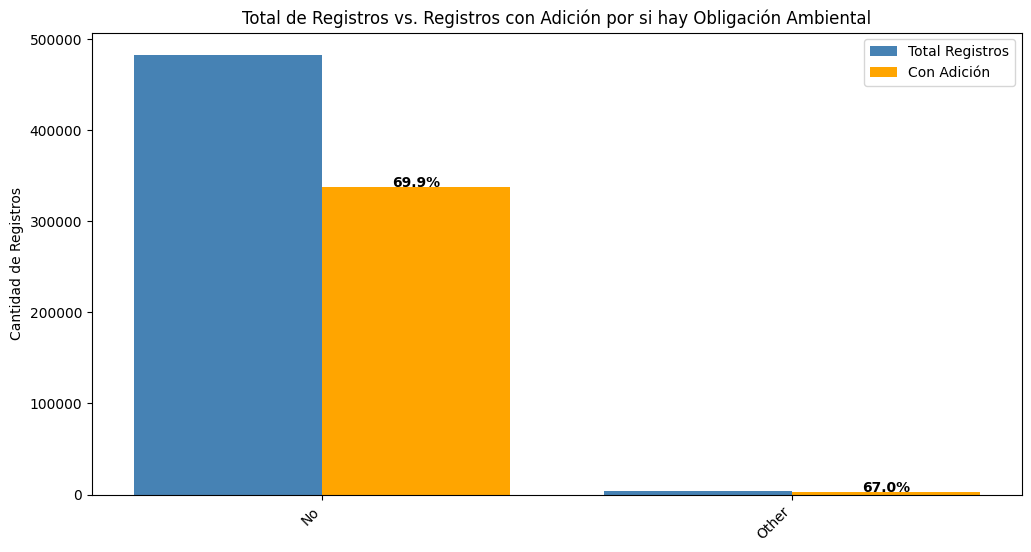

In [18]:
#Contar total de registros por si hay obligacion ambiental
total_por_obambiental = df['obligación ambiental'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_obambiental = df[df['Adicion'] == 1]['obligación ambiental'].value_counts()

# Unir ambas series en un DataFrame
df_obambiental = pd.DataFrame({'Total Registros': total_por_obambiental, 'Con Adición': adicion_por_obambiental}).fillna(0)

# Calcular el porcentaje de adición
df_obambiental["% Adición"] = (df_obambiental["Con Adición"] / df_obambiental["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_obambiental))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_obambiental['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_obambiental['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_obambiental["% Adición"]):
    ax.text(x[i] + width/2, df_obambiental["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_obambiental.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por si hay Obligación Ambiental")
ax.legend()

# Mostrar la gráfica
plt.show()

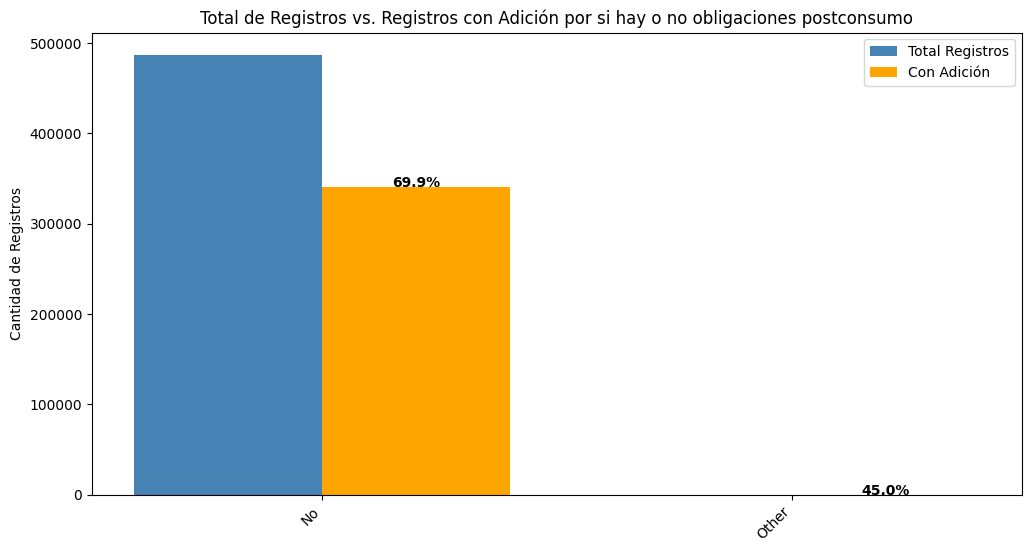

In [24]:
#Contar total de registros por si hay obligaciones postconsumo
total_por_postconsumo = df['obligaciones postconsumo'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_postconsumo = df[df['Adicion'] == 1]['obligaciones postconsumo'].value_counts()

# Unir ambas series en un DataFrame
df_postconsumo = pd.DataFrame({'Total Registros': total_por_postconsumo, 'Con Adición': adicion_por_postconsumo}).fillna(0)

# Calcular el porcentaje de adición
df_postconsumo["% Adición"] = (df_postconsumo["Con Adición"] / df_postconsumo["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_postconsumo))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_postconsumo['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_postconsumo['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_postconsumo["% Adición"]):
    ax.text(x[i] + width/2, df_postconsumo["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_postconsumo.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por si hay o no obligaciones postconsumo")
ax.legend()

# Mostrar la gráfica
plt.show()

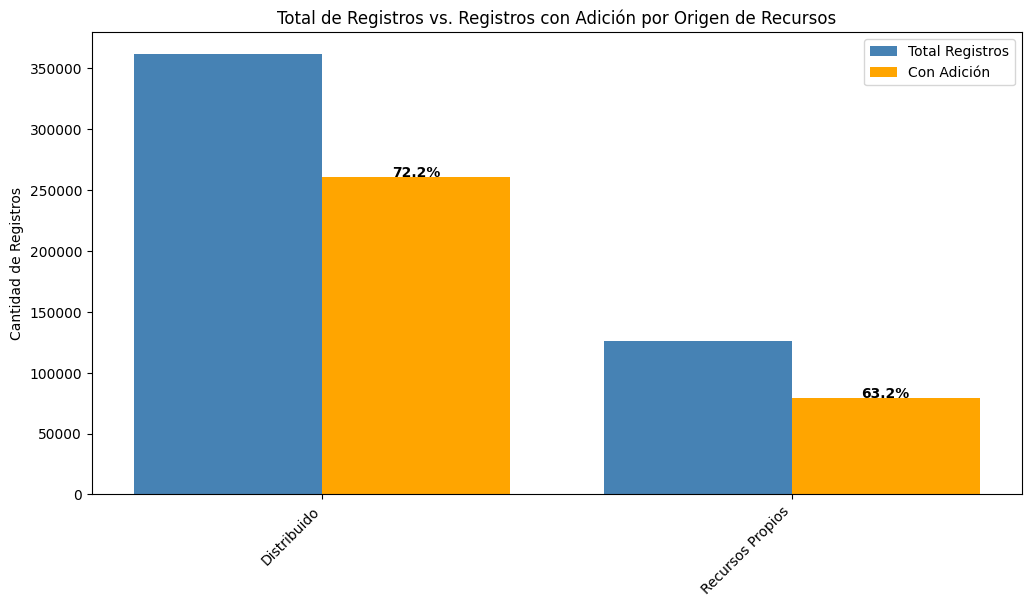

In [19]:
#Contar total de registros por origen de recursos
total_por_recursos = df['origen de los recursos'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_recursos= df[df['Adicion'] == 1]['origen de los recursos'].value_counts()

# Unir ambas series en un DataFrame
df_recursos = pd.DataFrame({'Total Registros': total_por_recursos, 'Con Adición': adicion_por_recursos}).fillna(0)

# Calcular el porcentaje de adición
df_recursos["% Adición"] = (df_recursos["Con Adición"] / df_recursos["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_recursos))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_recursos['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_recursos['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_recursos["% Adición"]):
    ax.text(x[i] + width/2, df_recursos["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_recursos.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Origen de Recursos")
ax.legend()

# Mostrar la gráfica
plt.show()

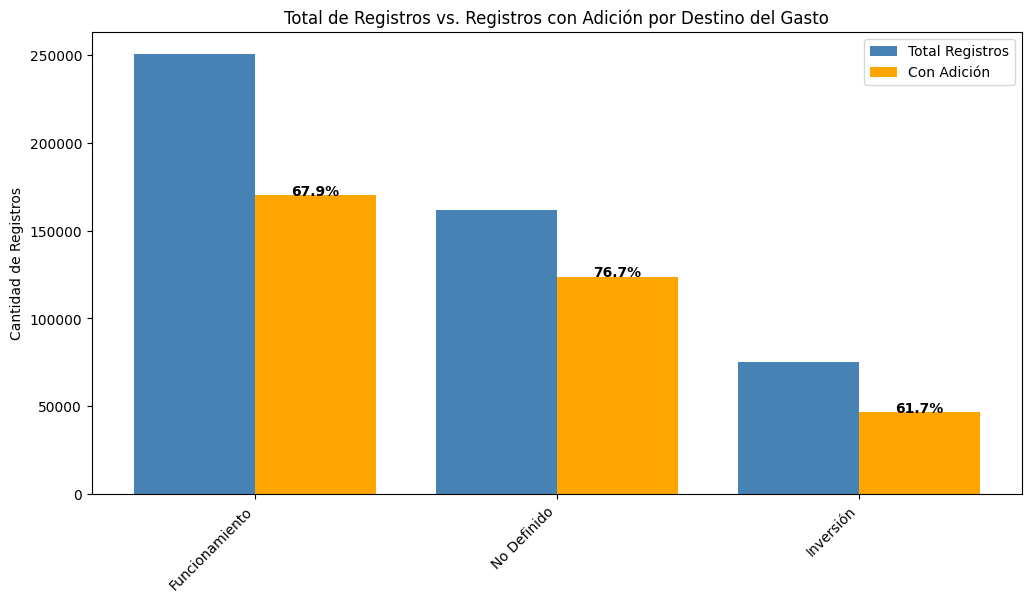

In [21]:
#Contar total de registros por destino del gasto
total_por_destino= df['destino gasto'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_destino = df[df['Adicion'] == 1]['destino gasto'].value_counts()

# Unir ambas series en un DataFrame
df_destino= pd.DataFrame({'Total Registros': total_por_destino, 'Con Adición': adicion_por_destino}).fillna(0)

# Calcular el porcentaje de adición
df_destino["% Adición"] = (df_destino["Con Adición"] / df_destino["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_destino))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_destino['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_destino['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_destino["% Adición"]):
    ax.text(x[i] + width/2, df_destino["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_destino.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Destino del Gasto")
ax.legend()

# Mostrar la gráfica
plt.show()

### División de categoricas y númericas

In [ ]:
# Seleccionar columnas categóricas, enteras y de punto flotante
catcols = df.select_dtypes(exclude=['int64', 'float64']).columns
intcols = df.select_dtypes(include=['int64']).columns
floatcols = df.select_dtypes(include=['float64']).columns


In [ ]:
catcols

In [ ]:
#No cuentan como duplicados debido a que los contratos pueden ser parecido pero se diferencian por la entidad, id contrato, etc que ya fueron eliminados

duplicates = len(df[df.duplicated()])
print(f'Number of Duplicate Entries: {duplicates}')

In [ ]:
# número de valores perdidos
missing_values = df.isnull().sum().sum()
print(f'Number of Missing Values: {missing_values}')

In [ ]:
missing_values_per_column = df.isnull().sum()
print(missing_values_per_column)

## Selección variables importantes con metodo de xgboost y RF

In [ ]:
# Separar variables independientes y dependiente
X = df.drop('adicion', axis=1)
y = df['adicion']

In [ ]:
# Identificar columnas categóricas y numéricas
catcols = [col for col in X.columns if X[col].dtype == 'object']
numcols = [col for col in X.columns if col not in catcols]

# Codificar las columnas categóricas
label_encoders = {}
for col in catcols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].fillna('Desconocido').astype(str))
    label_encoders[col] = le



### Random Forest

In [ ]:
# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Obtener las importancias y almacenarlas en un DataFrame
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
})
# Ordenar por importancia de mayor a menor
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Seleccionar las 10 más importantes
top_10_features_random = feature_importance_df.head(10)

# Mostrar el resultado
print("Las 10 variables con RF más importantes son:")
print(top_10_features_random)


### XGBOOST

In [ ]:
# Entrenar el modelo XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X, y)

# Obtener las importancias de las variables
importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
})

# Ordenar por importancia de mayor a menor
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Seleccionar las 10 más importantes
top_10_features_xgboost = feature_importance_df.head(10)

# Mostrar el resultado
print("Las 10 variables con xgboost más importantes son:")
print(top_10_features_xgboost)

### Listado final y generacion de df

In [ ]:
# Lista de variables importantes que quieres conservar
variables_importantes = ["estado contrato", "anno bpin", "estado bpin","destino gasto","orden","ciudad","tiempo duracion (dias)","obligación ambiental","recursos_propios_alcaldias_gobernaciones_resguardos","justificacion modalidad de contratacion"] 
variables_importantes.append("adicion")
# Eliminar todas las columnas excepto las de la lista 'variables_importantes'
df_importantes = df[variables_importantes]


In [ ]:
df_importantes

## Dummies

In [ ]:
catcols2=[]
for i in catcols:
    if i in variables_importantes:
        catcols2.append(i)

In [ ]:
catcols2

In [ ]:

# Codificación de variables categóricas
df_dummies = pd.get_dummies(df_importantes, columns=catcols2, dtype=int, drop_first=True)

# Identificar las categorías excluidas
excluded_categories = {}
for col in catcols2:
    unique_values = df_importantes[col].unique()
    excluded_categories[col] = unique_values[0]  # La primera categoría es la excluida

# Mostrar las categorías excluidas
print("Categorías excluidas por multicolinealidad:")
for col, category in excluded_categories.items():
    print(f"{col}: {category}")

# Visualizar el DataFrame con variables dummies
df_dummies


In [ ]:


cols = [col for col in df_dummies.columns if col != "adicion"] + ["adicion"]
df_dummies = df_dummies[cols]

# Mostrar el DataFrame con la columna 'adiciones' al final
df_dummies.head()


## Limpieza datos atipicos, etc

In [ ]:
X=df_dummies
var_ret=[]
for i in X.columns:
    if X[i].sum() <6068: #se eliminan columnas que tengan más de 95% de datos iguales 2260 es el 5% de la cantidad total de datos
         var_ret.append(i)

# Eliminar las columnas del dataframe
df_dummies.drop(columns=var_ret, inplace=True)


print(var_ret)
print(len(var_ret))


df_dummies.columns

In [ ]:
df_dummies